**Since, the best suited data for the task was already available in the kaggle for the competition named [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data),so I downloaded the dataset from there .**

***Out of 3 availabale CSVs files the one named "train.csv" was for the actual use in the task and the file named "test.csv" was just to evaluate the accuracy for the competition. So For the task , i downloaded "train.csv" and renamed it as "titanic_dataset.csv"***

**Data Dictionary**
<table>
  <tr>
    <th> Variable</th>
    <th>Definition</th>
    <th>Key</th>
  </tr>
  <tr>
    <td>survived</td>
    <td>Survival</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>pclass</td>
    <td>Ticket class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>    
  </tr>
  <tr>
    <td>sex</td>
    <td>Gender</td>
    <td></td>    
  </tr>
  <tr>
    <td>Age</td>
    <td>Age in years</td>
    <td></td>    
  </tr>
  <tr>
    <td>sibsp</td>
    <td># of siblings / spouses aboard the Titanic</td>
    <td></td>    
  </tr>
  <tr>
    <td>parch</td>
    <td># of parents / children aboard the Titanic</td>
    <td></td>    
  </tr>
  <tr>
    <td>ticket</td>
    <td>Ticket number</td>
    <td></td>    
  </tr>
  <tr>
    <td>fare</td>
    <td>Passenger fare</td>
    <td></td>    
  </tr>
  <tr>
    <td>cabin</td>
    <td>Cabin number</td>
    <td></td>    
  </tr>
  <tr>
    <td>embarked</td>
    <td>Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton</td>
    <td></td>    
  </tr>
</table>


**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

**IMPORTING NECESSARY LIBRARIES**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Accessing the datset and loading it into pandas dataframe
df = pd.read_csv('/content/titanic_dataset.csv')

In [26]:
#let's take a look , how it looks
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#let's check the structure of the dataset and find out missing values
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*We clearly can see there are missing values on columns **Age** , **Cabin** and **Embarked** , Now let's visulaize them*

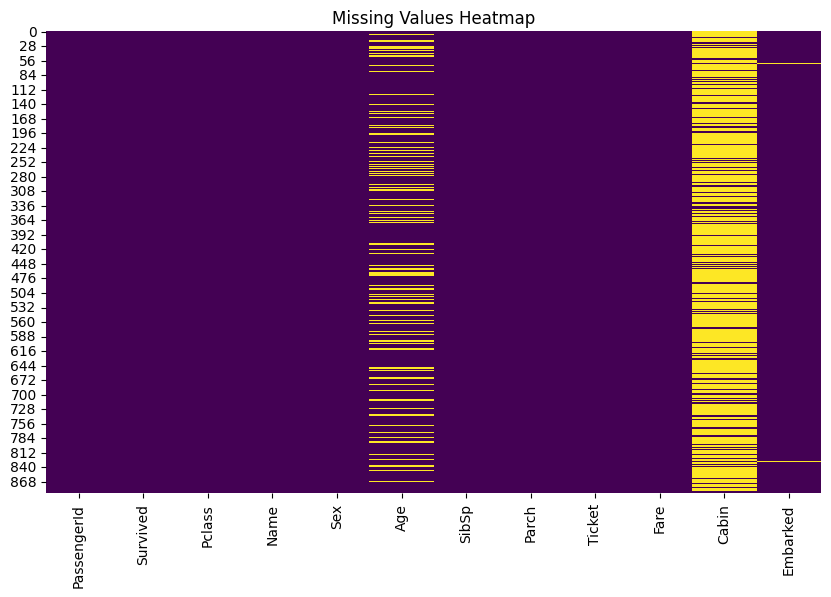

In [28]:
# missing values
missing_values = df.isnull().sum()
missing_values

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

*Now, let's handle them as it might can cause biasness*

In [30]:
#  missing values in 'Age' can be handeled by median since it's numerical
df['Age'].fillna(df['Age'].median(), inplace=True)

#  'Embarked' being a categorical it can be handeled using mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Let's drop 'Cabin' column due to too many missing values and also as we can generalize it won't contribute that much for the Survived
df.drop(columns=['Cabin'], inplace=True)

<ipython-input-30-0898f6aba06a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-30-0898f6aba06a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [32]:
# Let's verify missing values after handling
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#**EXPLORATORY DATA ANALYSIS -(EDA) AND FEATURE ENGINEERING**

*lET'S EXPLORE THE DATA TO UNCOVER HIDDEN PATTERNS AND INSIGHTS*

<Figure size 1200x600 with 0 Axes>

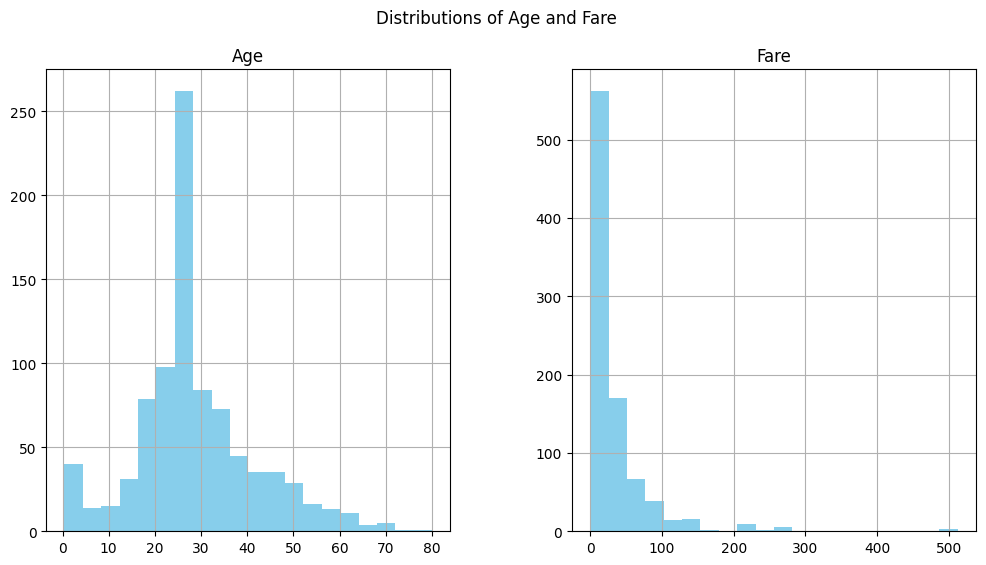

In [34]:
# Distribution of numerical features
plt.figure(figsize=(12, 6))
df[['Age', 'Fare']].hist(bins=20, figsize=(12, 6), layout=(1, 2), color='skyblue')
plt.suptitle('Distributions of Age and Fare')
plt.show()


**conlusions:**


1.   **Age**:


* The distribution is right-skewed, meaning there are more younger passengers than older ones.
* The peak is around 20-30 years, indicating that most passengers fall within this age range.
* A few passengers are much older, but their numbers decrease gradually.


2.   **Fare**:
* The fare distribution is highly right-skewed, meaning most passengers paid lower fares.
* A significant number of passengers paid fares close to 0-50.
* Some passengers paid much higher fares, with a few extreme outliers (above 300-500).

**Hence, Most passengers were young adults.
The majority of fares were low, but a few passengers paid significantly higher amounts, likely indicating different classes or ticket types.**


<ipython-input-36-bc4afd0a41c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


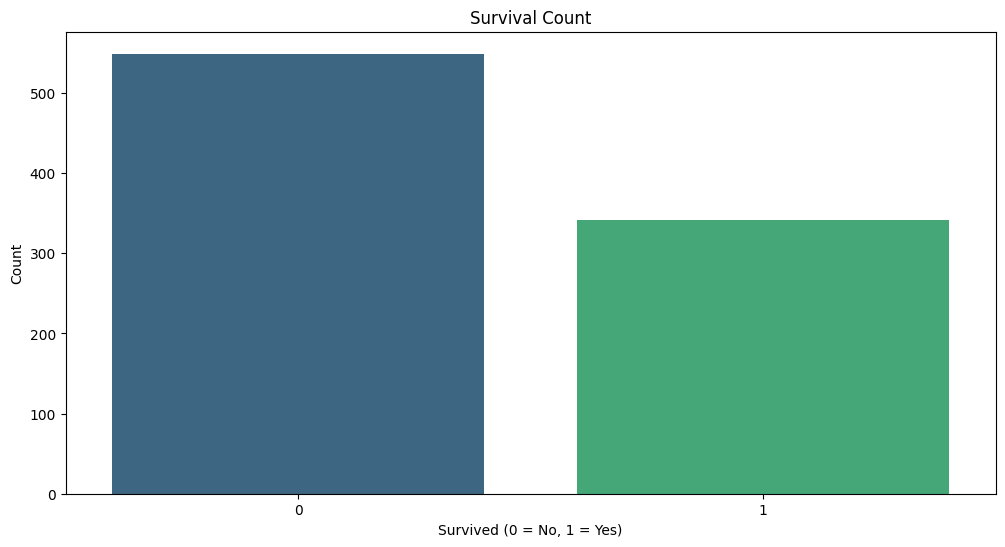

In [36]:
# Survival rates by category
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Hence , the count of survival is less than that of unable to suvive**

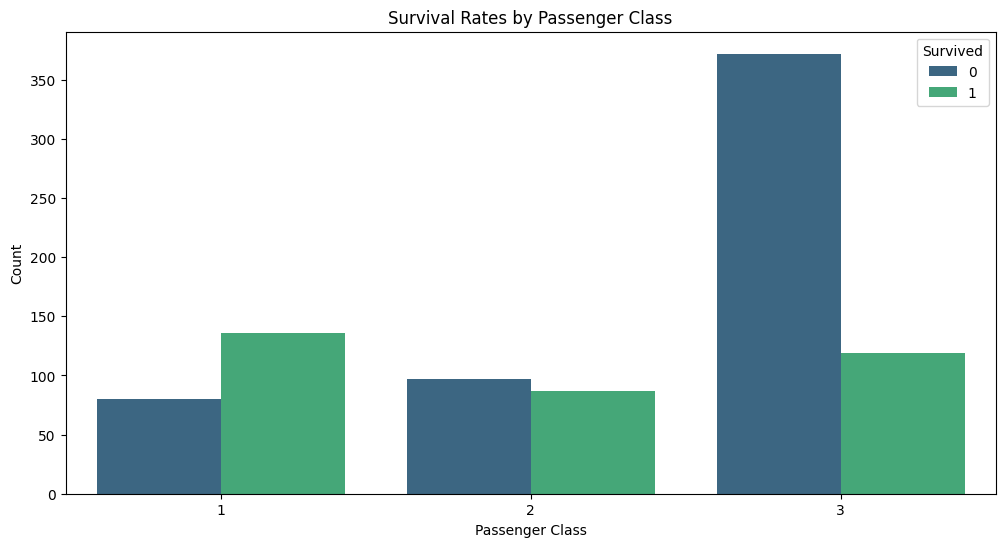

In [38]:
# Survival rates by Passenger Class
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

**Observations :**


**1.   Class 1 (First Class):**
Indicates that first-class passengers had a higher survival rate.


**2.  Class 2 (Second Class):**
Suggests a moderate survival rate for second-class passengers.

**3.  Class 3 (Third Class):**
Suggests that third-class passengers had the lowest survival rate.

**There is a clear pattern where first-class passengers had the highest survival rate, followed by second-class, and third-class had the lowest.**

**This could be due to socioeconomic factors, as wealthier passengers (first-class) had better access to lifeboats.**

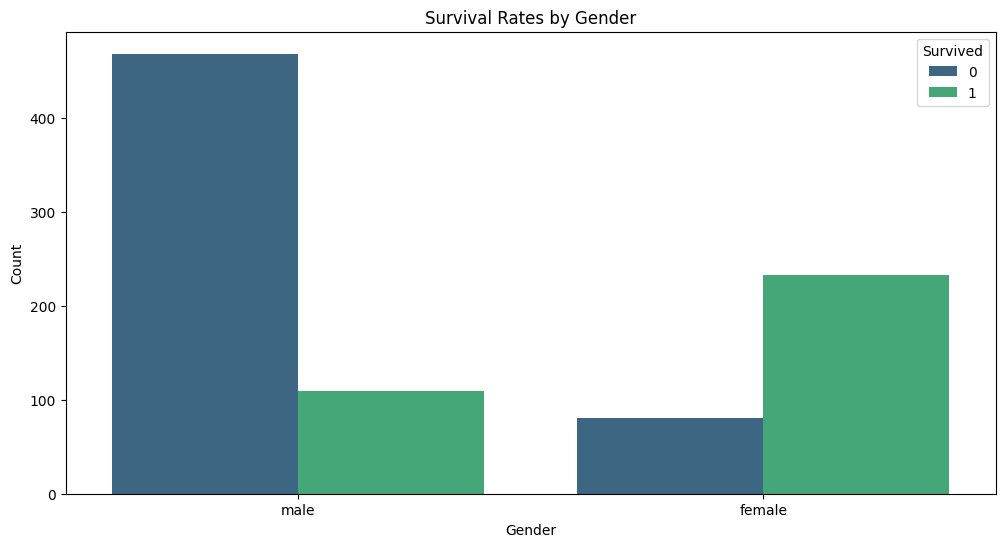

In [40]:
# Gender-wise survival rates
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

<ipython-input-42-36795be26c39>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], shade=True, label='Survived', color='green')
<ipython-input-42-36795be26c39>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], shade=True, label='Not Survived', color='red')


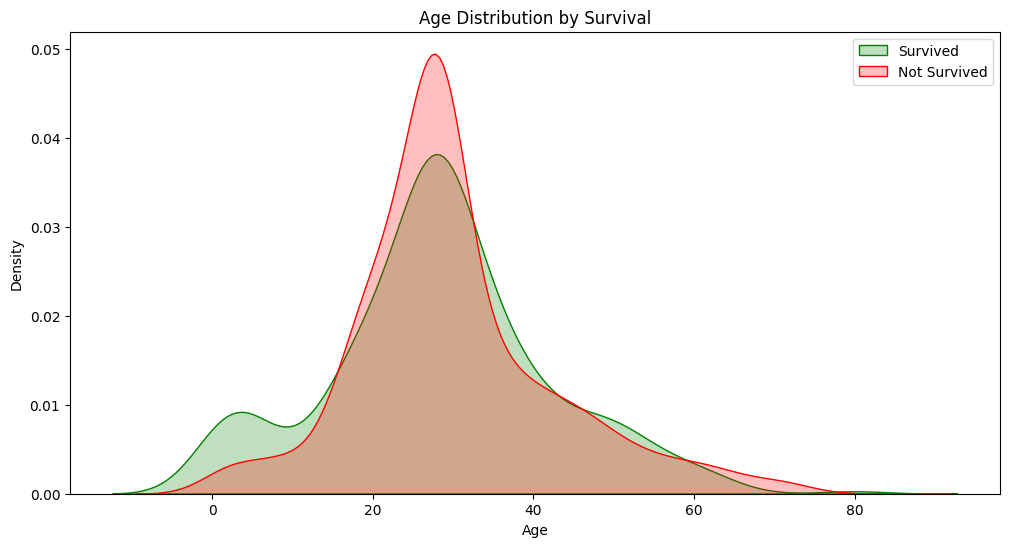

In [42]:
# Age distribution by survival
plt.figure(figsize=(12, 6))
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], shade=True, label='Survived', color='green')
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], shade=True, label='Not Survived', color='red')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

* The survival rate of females is seen significantly higher than that of males.
* The survival rate of age group 0 to 5 is significantly higher
* This suggests a possible "women and children first" policy, which may have been in effect during evacuation.
* The low survival rate of males indicates that men were less prioritized for rescue.
* The low survival rate of older ones indicate they were less priotized


**Let's Add new features**
* 'FamilySize' provides insight into survival based on family presence.

* 'IsAlone' identifies passengers traveling alone, which may affect survival.

In [46]:
# Creating a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [48]:
# Creating a new feature 'IsAlone'
df['IsAlone'] = 1  # Initialize to 1 (alone)
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # Set to 0 if family size > 1

<ipython-input-48-452cb6a2ac4d>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # Set to 0 if family size > 1
<ipython-input-48-452cb6a2ac4d>:3: SettingWithCopyWarning: 
A value is trying to be s

In [49]:
#Let's see how it looks with new features
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


**Let's visualize new features**

<ipython-input-57-5411d87369c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette='viridis')


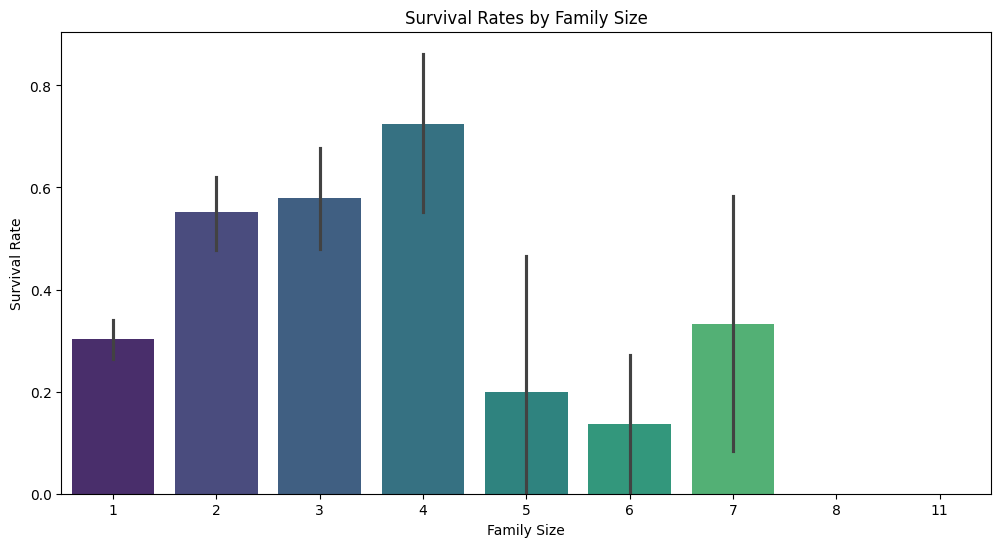

In [57]:
# Survival rates by FamilySize
plt.figure(figsize=(12, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, palette='viridis')
plt.title('Survival Rates by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

**Observations:**


*   Being alone (family size = 1) or in a very large family significantly reduced survival chances.
*  Moderate family sizes (2-4 members) had the highest likelihood of survival, possibly due to a balance between support and resource availability.



<ipython-input-58-2f419f8e9eed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsAlone', y='Survived', data=df, palette='viridis')


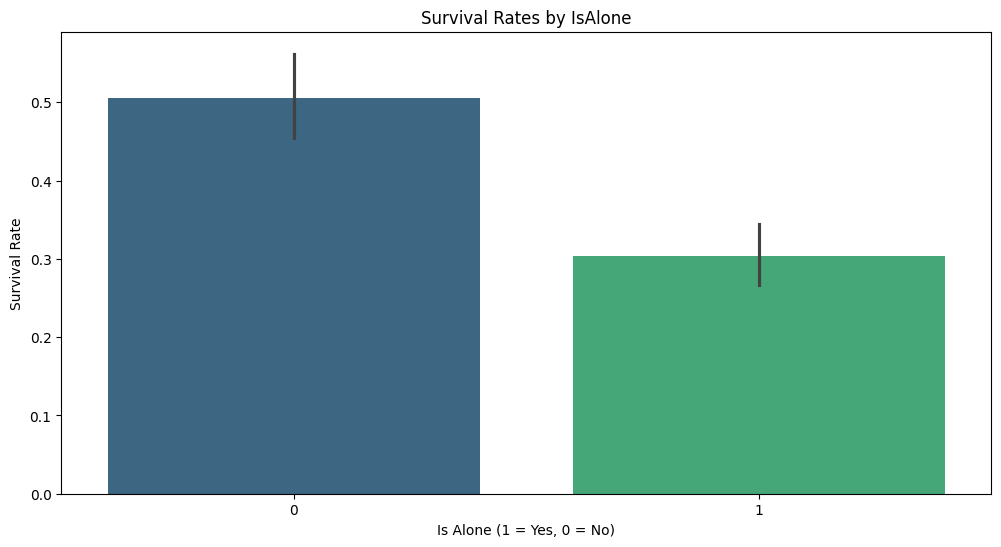

In [58]:
# Survival rates by IsAlone
plt.figure(figsize=(12, 6))
sns.barplot(x='IsAlone', y='Survived', data=df, palette='viridis')
plt.title('Survival Rates by IsAlone')
plt.xlabel('Is Alone (1 = Yes, 0 = No)')
plt.ylabel('Survival Rate')
plt.show()

This suggests that being with others may have positively influenced survival chances.

*As we can Genralize in genral  ; **PassengerId** ,**Name** & **Ticket** won't contribute to Survival prediction so let's drop them*

In [50]:
# Dropping 'PassengerId', 'Name', and 'Ticket' columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

**To See correlations,** now let's encode the categorical values of **Sex** and **Embarked**

In [51]:
# encoding Sex with value male to 0 and female to 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# encoding Embarked  with value C to 0 , Q to 1 & S to 2
df['Embarked']=df['Embarked'].map({"C":0,"Q":1,"S":2})

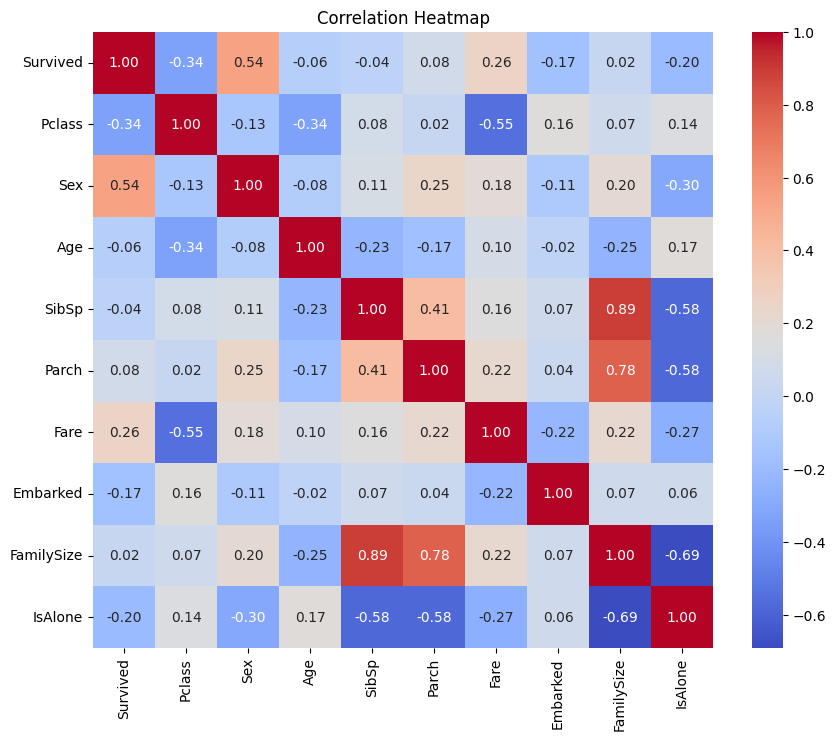

In [53]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Hence, **"Sex"**(negatively) , **"Pclass"**(positively)  hive high correlation with **"Survived"** in comparison to other features.

**Analyzing relation between Sex and Age together with Survived**

In [55]:
# Count unique values of 'Survived' for Sex = 0
sex_0_survived_counts = df[df['Sex'] == 0]['Survived'].value_counts()
print("Survived counts for Sex = 0:\n", sex_0_survived_counts)

# Count unique values of 'Survived' for Sex = 1
sex_1_survived_counts = df[df['Sex'] == 1]['Survived'].value_counts()
print("\nSurvived counts for Sex = 1:\n", sex_1_survived_counts)

Survived counts for Sex = 0:
 Survived
0    468
1    109
Name: count, dtype: int64

Survived counts for Sex = 1:
 Survived
1    233
0     81
Name: count, dtype: int64


**Here the ratio of survived to not survived for male is almost 11 : 45 and for female is 28 : 11 , that's why i tried to match those ratios in bins in below diagram for better visualization , and also dropped those records having empty value for age**

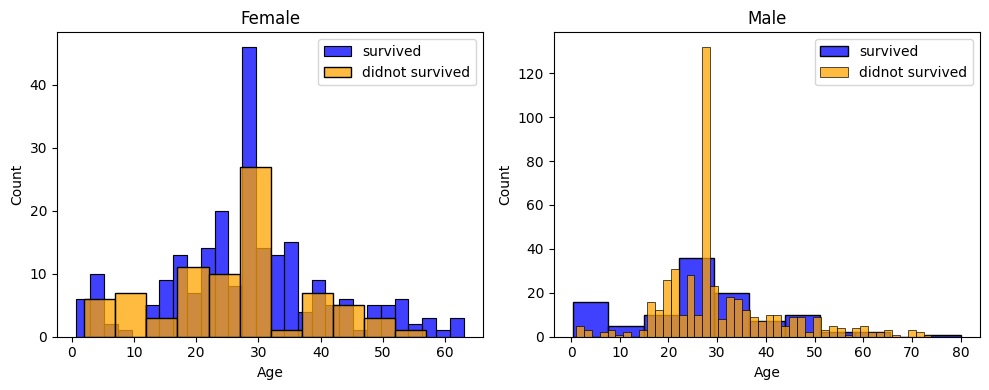

In [54]:
# Defining labelsfor survivals values
survived = "survived"
not_survived = "didnot survived"

# Create subplots for male and female
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Filter data by Sex
women = df[df['Sex'] == 1]
men = df[df['Sex'] == 0]

# Plot for Female
sns.histplot(women[women['Survived'] == 1]['Age'].dropna(), bins=28, ax=axes[0], color="blue", label=survived, kde=False)
sns.histplot(women[women['Survived'] == 0]['Age'].dropna(), bins=11, ax=axes[0], color="orange", label=not_survived, kde=False)
axes[0].legend()
axes[0].set_title('Female')

# Plot for Male
sns.histplot(men[men['Survived'] == 1]['Age'].dropna(), bins=11, ax=axes[1], color="blue", label=survived)
sns.histplot(men[men['Survived'] == 0]['Age'].dropna(), bins=45, ax=axes[1], color="orange", label=not_survived)
axes[1].legend()
axes[1].set_title('Male')

# Show the plot
plt.tight_layout()
plt.show()

**As we can see that men have a high probability of survival when they are between 18 and 36 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 18 and 32.**

**For men the probability of survival is very low between the age of 8 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.**

**Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I have to create age groups later on.**

# **Data Preparation**

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,2,2,0
1,1,1,1,38.0,1,0,71.2833,0,2,0
2,1,3,1,26.0,0,0,7.9250,2,1,1
3,1,1,1,35.0,1,0,53.1000,2,2,0
4,0,3,0,35.0,0,0,8.0500,2,1,1


In [60]:
#importing library for normalizing features
from sklearn.preprocessing import StandardScaler

# Let's normalize numerical features
#It ensures numerical features are on the same scale, improving model performance.
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,-0.565736,1,0,-0.502445,2,2,0
1,1,1,1,0.663861,1,0,0.786845,0,2,0
2,1,3,1,-0.258337,0,0,-0.488854,2,1,1
3,1,1,1,0.433312,1,0,0.420730,2,2,0
4,0,3,0,0.433312,0,0,-0.486337,2,1,1


**Now Lte's save the preprocessed dataframe**

In [67]:
# saving preprocessed df

df.to_csv('titanic_processed.csv', index=False)